<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/Tarea5/GaussianProcessRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Procesos Gaussianos**



##**Técnicas para construir kernels**

- En general, un kernel puede entenderse como la extensión del producto interno en un espacio de Hilbert con núcleo reproductivo (Reproducing Kernel Hilbert Space-RKHS):

$$ \kappa(x,x') = \langle \phi(x), \phi(x')\rangle_\mathscr{H} $$

- $x \in \mathbb{R}^P$ y $\phi : \mathbb{R}^P \to \mathbb{R}^Q$, tal que $Q\to \infty$.

- Además, dados dos kernels $\kappa_1(x,x')$ y $\kappa_2(x,x')$, las siguientes combinaciones generan kernels validos:


$\kappa(x,x') = c \kappa_1(x,x') $

$\kappa(x,x') = f(x)\kappa_1(x,x')f(x')$

$\kappa(x,x') = g(\kappa_1(x,x'))$

$\kappa(x,x') = \exp(\kappa_1(x,x'))$

$\kappa(x,x') = \kappa_1(x,x')+\kappa_2(x,x')$

$\kappa(x,x') = \kappa_1(x,x')\kappa_2(x,x')$

$\kappa(x,x') = \kappa_3(\varphi(x),\varphi(x'))$

$\kappa(x,x') = x^\top A {x'}$



- $c\in\mathbb{R}^+$, $f(\cdot)$ es cualquier función, $g(\cdot)$ es un polinomio con coeficientes positivos, $\kappa_3(\cdot,\cdot)$ es un kernel valido, $A$ es una matriz semidefinida positiva.

##**Métodos kernel sobre esquema Bayesiano**

- Los Procesos Gaussianos (Gaussian Process - GPs) extienden el método parámetrico para definir la incertidumbre de los parámetros del regresor al imponer un prior sobre funciones directamente en RKHS.

- En general, los métodos como [ARMA](https://en.wikipedia.org/wiki/Autoregressive_moving-average_model) (autoregressive moving average), Kalman filter, y redes de base radial, pueden explicarse como casos particularles de GPs.

- Un GP es un conjunto de variables aleatorias con probabilidad conjunta Gaussiana.

- EL GP se define completamente por su media $m(\mathbf{x})$ y su covarianza $\kappa(\mathbf{x},\mathbf{x}')$ desde una función $f(\mathbf{x})\in\mathbb{R}$, con $f(\mathbf{x})=\phi(\mathbf{x})^\top \mathbf{w}$; $\mathbf{w}\sim \mathscr{N}(\mathbf{w}|\mathbf{0},\mathbf{\Sigma_w})$; $\mathbf{\Sigma_w}\in\mathbb{R}^{Q \times Q}$; $\phi:\mathbb{R}^P\to\mathbb{R}^Q,$ tal que:



$m(\mathbf{x})=\mathbb{E}\{f(\mathbf{x})\} = \mathbb{E}\{\phi(\mathbf{x})^\top \mathbf{w}\}= \phi(\mathbf{x})^\top \mathbb{E}\{\mathbf{w}\} = 0$

$\kappa(\mathbf{x},\mathbf{x}') = cov(f(\mathbf{x}),f(\mathbf{x}')) = \mathbb{E}\{f(\mathbf{x})f(\mathbf{x}')\} = \mathbb{E}\{\phi(\mathbf{x})^\top \mathbf{w}\mathbf{w}^\top\phi^\top(\mathbf{x}')\} = \phi(\mathbf{x})^\top \mathbb{E}\{\mathbf{w}\mathbf{w}^\top\}\phi(\mathbf{x}') = \phi(\mathbf{x})^\top \mathbf{\Sigma_w}\phi(\mathbf{x}')$

- $f \sim \mathscr{GP}(f|\mathbf{0},\mathbf{K})$

con $\mathbf{K}\in \mathbb{R}^{N \times N}$; $\mathbf{K}=[\kappa(\mathbf{x},\mathbf{x}')]$

- Para el caso de datos contaminados con ruido blanco Gaussiano:

$t_n = f(\mathbf{x}_n) + \epsilon_n$

con $\epsilon_n \sim \mathscr{N}(\epsilon_n|0,\sigma_\epsilon^2)$, y:

$p(\mathbf{t}|f(\mathbf{X})) = \mathscr{N}((\mathbf{t}|f(\mathbf{X}),\sigma_\epsilon^2 \mathbf{I}_N)$

$p(f(\mathbf{X})) = \mathscr{N}(f(\mathbf{X})|\mathbf{0},\mathbf{K})$

- La marginal sobre la salida se puede determinar como:

$p(\mathbf{t}) = \int p(\mathbf{t}|f(\mathbf{X}))p(f(\mathbf{X}))df = \mathscr{N}(\mathbf{t}|\mathbf{0},\mathbf{K}+\sigma_\epsilon^2 \mathbf{I}_N)$


##**Ejercicio**

Demostrar que $p(\mathbf{t})= \mathscr{N}(\mathbf{t}|\mathbf{0},\mathbf{K}+\sigma_\epsilon^2 \mathbf{I}_N)$. Ver [1_TAM_ConceptosBasicos.ipynb](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/1_Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb).

---
##**Solución**

Sea $t=f+\varepsilon$ con $\varepsilon\sim\mathcal{N}(0,\sigma_\varepsilon^2 I_N)$ y el prior sobre $f$:

$$
p(f)=\mathcal{N}(f\mid 0,K).
$$

Queremos probar que:

$$
p(t)=\int p(t\mid f)\,p(f)\,df=\mathcal{N}\big(t\mid 0,\;K+\sigma_\varepsilon^2 I_N\big).
$$

---

Empezamos escribiendo las densidades gaussianas (sea $\Sigma_\varepsilon=\sigma_\varepsilon^2 I_N$):

$$
p(t\mid f)=(2\pi)^{-N/2}|\Sigma_\varepsilon|^{-1/2}\exp\!\Big(-\tfrac12 (t-f)^\top\Sigma_\varepsilon^{-1}(t-f)\Big),
$$

$$
p(f)=(2\pi)^{-N/2}|K|^{-1/2}\exp\!\Big(-\tfrac12 f^\top K^{-1} f\Big).
$$

Por tanto:

$$
\begin{aligned}
p(t)
&= \int p(t\mid f)\,p(f)\,df \\
&= (2\pi)^{-N}|\Sigma_\varepsilon|^{-1/2}|K|^{-1/2}
\int \exp\!\Big(-\tfrac12\big[(t-f)^\top\Sigma_\varepsilon^{-1}(t-f) + f^\top K^{-1}f\big]\Big)\,df.
\end{aligned}
$$

---
Expandimos el término cuadrático en el exponente:

$$
(t-f)^\top\Sigma_\varepsilon^{-1}(t-f) + f^\top K^{-1}f
= f^\top\big(K^{-1}+\Sigma_\varepsilon^{-1}\big)f -2 f^\top\Sigma_\varepsilon^{-1}t + t^\top\Sigma_\varepsilon^{-1}t.
$$

Usamos la fórmula estándar de la integral gaussiana en $\mathbb{R}^N$:

$$
\int \exp\!\Big(-\tfrac12 f^\top M f + r^\top f\Big)\,df
= (2\pi)^{N/2}|M|^{-1/2}\exp\!\Big(\tfrac12 r^\top M^{-1} r\Big),
$$

válida para $M$ simétrica definida positiva. Aquí tomamos:

$$
M = K^{-1}+\Sigma_\varepsilon^{-1},\qquad r=\Sigma_\varepsilon^{-1}t.
$$

Aplicando la fórmula obtenemos:

$$
\begin{aligned}
p(t)
&= (2\pi)^{-N}|\Sigma_\varepsilon|^{-1/2}|K|^{-1/2}\,(2\pi)^{N/2}|M|^{-1/2}
\exp\!\Big(-\tfrac12 t^\top\Sigma_\varepsilon^{-1}t + \tfrac12 r^\top M^{-1} r\Big)\\[4pt]
&= (2\pi)^{-N/2}|\Sigma_\varepsilon|^{-1/2}|K|^{-1/2}|M|^{-1/2}
\exp\!\Big(-\tfrac12\, t^\top\big(\Sigma_\varepsilon^{-1}-\Sigma_\varepsilon^{-1}M^{-1}\Sigma_\varepsilon^{-1}\big)t\Big).
\end{aligned}
$$

---
Ahora usamos dos identidades matriciales (fáciles de verificar):

$$
M = K^{-1}+\Sigma_\varepsilon^{-1}\quad\Longrightarrow\quad
\Sigma_\varepsilon^{-1}-\Sigma_\varepsilon^{-1}M^{-1}\Sigma_\varepsilon^{-1} = (K+\Sigma_\varepsilon)^{-1},
$$

y para los determinantes:

$$
|M| = |K^{-1}+\Sigma_\varepsilon^{-1}| = \frac{|K+\Sigma_\varepsilon|}{|K|\,|\Sigma_\varepsilon|}.
$$

Sustituyendo estas relaciones en la expresión de \(p(t)\) se simplifica el prefactor:

$$
|\Sigma_\varepsilon|^{-1/2}|K|^{-1/2}|M|^{-1/2}
= |K+\Sigma_\varepsilon|^{-1/2},
$$

y el exponente queda con la forma $-\tfrac12 t^\top (K+\Sigma_\varepsilon)^{-1} t$. Por tanto:

$$
p(t) = (2\pi)^{-N/2}\,|K+\Sigma_\varepsilon|^{-1/2}\,
\exp\!\Big(-\tfrac12\, t^\top (K+\Sigma_\varepsilon)^{-1} t\Big),
$$

es decir,

$$
\boxed{\; p(t) = \mathcal{N}\big(t\mid 0,\; K + \sigma_\varepsilon^2 I_N\big)\;},
$$

que es justo la forma buscada.


---
**Corolario**

Un resultado directamente de esta prueba es que la convolución de un par de Gaussianas resulta en una Gaussiana cuya media y covarianza es la suma de las medias y las covarianzas de las Gaussianas originales.


##**Predicción de nuevas muestras**

Para una nueva muestra $\mathbf{x}_*\in\mathbb{R}^P$, tenemos que:


$\begin{bmatrix}
\mathbf{t} \\
t_*
\end{bmatrix}\sim \mathscr{N}\left(\begin{bmatrix}
\mathbf{t} \\
t_*
\end{bmatrix}\Big|\begin{bmatrix}
\mathbf{0} \\
0
\end{bmatrix},\begin{bmatrix}
\mathbf{K}+\sigma_\epsilon\mathbf{I} & \mathbf{k}_* \\
\mathbf{k}_* ^\top & \kappa(\mathbf{x}_*,\mathbf{x}_*)+\sigma_\epsilon^2
\end{bmatrix}\right)$


con $\mathbf{k}_*=[\kappa(\mathbf{x}_*,\mathbf{x})]$


- La probabilidad condicional $p(t_*|f(\mathbf{x}_*),f(\mathbf{X}))$ se puede determinar como:

$p(t_*|f(\mathbf{x}_*),f(\mathbf{X})) = \mathscr{N}(t_*|m(\mathbf{x}_*),cov(f(\mathbf{x}_*),f(\mathbf{X})))$

con:

$m(\mathbf{x}_*)=\mathbf{k}_*^\top\left(\mathbf{K}+\sigma_\epsilon^2\mathbf{I}\right)^{-1}\mathbf{t}$

$cov(f(\mathbf{x}_*),f(\mathbf{X})))=\kappa(\mathbf{x}_*,\mathbf{x}_*)+\sigma_\epsilon^2-\mathbf{k}_*^\top\left(\mathbf{K}+\sigma_\epsilon^2\mathbf{I}\right)^{-1}\mathbf{k}_*$


##**Ejercicio**

Demostrar la expresión de la probilidad condicional $p(t_*|f(\mathbf{x}_*),f(\mathbf{X}))$. Ver [1_TAM_ConceptosBasicos.ipynb](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/1_Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb).

---
##**Solución**
Partimos de la definición del modelo de proceso Gaussiano con ruido aditivo:

$$
t = f(\mathbf{X}) + \varepsilon, \qquad \varepsilon \sim \mathcal{N}(0, \sigma_\varepsilon^2 \mathbf{I}_N),
$$


$$
p(f(\mathbf{X})) = \mathcal{N}(0, \mathbf{K}),
$$
donde $\mathbf{K}$ es la matriz de covarianza tal que $\mathbf{K}_{ij} = \kappa(\mathbf{x_i}, \mathbf{x_j})$.

---

Para una nueva muestra $\mathbf{x_*}$, definimos el valor de función $f_* = f(\mathbf{x_*})$ y la covarianza cruzada:

$$
\mathbf{k_*} = [\kappa(\mathbf{x_*}, \mathbf{x_1}), \dots, \kappa(\mathbf{x_*}, \mathbf{x_N})]^\top.
$$

La distribución conjunta de las variables observadas $t$ y del valor de función $f_*$ está dada por:

$$
\begin{bmatrix}
t \\ f_*
\end{bmatrix}
\sim
\mathcal{N}\!\left(
\begin{bmatrix}
0 \\ 0
\end{bmatrix},
\begin{bmatrix}
\mathbf{K} + \sigma_\varepsilon^2 \mathbf{I}_N & \mathbf{k_*} \\
\mathbf{k_*}^\top & \kappa(\mathbf{x_*}, \mathbf{x_*})
\end{bmatrix}
\right).
$$

---

Recordemos que si un vector gaussiano
$$
\begin{bmatrix}
a \\ b
\end{bmatrix}
\sim
\mathcal{N}\!\left(
\begin{bmatrix}
\mu_a \\ \mu_b
\end{bmatrix},
\begin{bmatrix}
\Sigma_{aa} & \Sigma_{ab} \\
\Sigma_{ba} & \Sigma_{bb}
\end{bmatrix}
\right),
$$
entonces su condicional $p(b\mid a)$ también es gaussiano con:

$$
p(b\mid a) = \mathcal{N}\!\big(\mu_b + \Sigma_{ba}\Sigma_{aa}^{-1}(a-\mu_a),\; \Sigma_{bb} - \Sigma_{ba}\Sigma_{aa}^{-1}\Sigma_{ab}\big).
$$

---

En nuestro caso particular:

$$
a = t, \quad b = f_*, \quad \mu_a = \mu_b = 0,
$$
$$
\Sigma_{aa} = \mathbf{K} + \sigma_\varepsilon^2 \mathbf{I}_N, \quad
\Sigma_{ab} = \mathbf{k_*}, \quad
\Sigma_{bb} = \kappa(\mathbf{x_*}, \mathbf{x_*}).
$$

Entonces, aplicando la propiedad anterior:

$$
p(f_* \mid t)
= \mathcal{N}\!\big(\mathbf{k_*}^\top(\mathbf{K} + \sigma_\varepsilon^2 \mathbf{I}_N)^{-1} t,\;
\kappa(\mathbf{x_*}, \mathbf{x_*}) - \mathbf{k_*}^\top(\mathbf{K} + \sigma_\varepsilon^2 \mathbf{I}_N)^{-1}\mathbf{k_*}\big).
$$

---

El valor observado $t_*$ está relacionado con el valor de función $f_*$ por:
$$
t_* = f_* + \varepsilon_*, \quad \varepsilon_* \sim \mathcal{N}(0, \sigma_\varepsilon^2).
$$

Por tanto, la distribución condicional de la salida observada $t_*$ es:

$$
p(t_* \mid t) = \int p(t_* \mid f_*)\, p(f_* \mid t)\, df_*.
$$

Dado que ambas son gaussianas, la integral es analítica y produce otra distribución normal *(Teorema Anterior)* con:

$$
m(\mathbf{x_*}) = \mathbf{k_*}^\top(\mathbf{K} + \sigma_\varepsilon^2 \mathbf{I}_N)^{-1} t,
$$
$$
\mathrm{cov}(t_*, f(\mathbf{X})) = \kappa(\mathbf{x_*}, \mathbf{x_*}) + \sigma_\varepsilon^2 - \mathbf{k_*}^\top(\mathbf{K} + \sigma_\varepsilon^2 \mathbf{I}_N)^{-1}\mathbf{k_*}.
$$

---
Finalmente:
$$
\boxed{
p(t_* \mid f(\mathbf{x_*}), f(\mathbf{X})) =
\mathcal{N}\!\big(t_* \mid m(\mathbf{x_*}), \mathrm{cov}(f(\mathbf{x_*}), f(\mathbf{X}))\big)
}
$$

donde:
$$
m(\mathbf{x_*}) = \mathbf{k_*}^\top (\mathbf{K} + \sigma_\varepsilon^2 \mathbf{I}_N)^{-1} t,
\qquad
\mathrm{cov}(f(\mathbf{x_*}), f(\mathbf{X})) = \kappa(\mathbf{x_*}, \mathbf{x_*}) + \sigma_\varepsilon^2 - \mathbf{k_*}^\top(\mathbf{K} + \sigma_\varepsilon^2 \mathbf{I}_N)^{-1}\mathbf{k_*}.
$$

---

**Corolario**  
La distribución condicional de una nueva observación en un proceso gaussiano con ruido es también una Gaussiana. Su media es una combinación lineal de los datos observados, ponderada por la covarianza, y su varianza refleja tanto la incertidumbre del proceso como el ruido del modelo, suma de covarianzas.


##**Sintonización de hiperparámetros**

- Para sintonizar los hiperparámetros en los GP, generalmente se busca maximizar la verosimilitud $p(\mathbf{t}|\theta)$, siendo $\theta$ un hiperparámetro de $\kappa(\cdot,\cdot|\theta).$

##**Regresor por Procesos Gaussianos en sklearn**

Ver [sklearn.gaussian_process.GaussianProcessRegressor
](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor)





##**Ejemplo**

- Se pretende generar un modelo de regresión bajo entradas con ruido blanco Gaussiano, con $\mu_\eta=0$, para seguir una función no lineal tipo sinc(x).

- $y = {\rm{sinc}}(x)+\eta$;  
con $\eta\sim p(\eta)=\mathscr{N}(\eta|\mu_\eta,\sigma_\eta^2)=\frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|_2^2}{2\sigma^2_\eta}\right)$

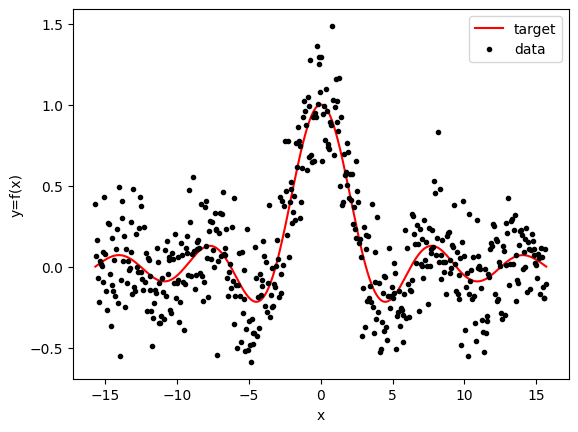

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 500    # Número de muestras
X = np.linspace(-5*np.pi,5*np.pi,N) # Vector de entrada
y = np.sinc(X/np.pi) # Función sinc -> objetivo
var = 0.05  # Varianza del ruido
mue = 0    # Media del ruido

noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])#ruido blanco
yn = y + noise  # Señal con ruido

plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

**Nota:** $${\rm{sinc}}(\theta)=\frac{\sin(\theta)}{\theta}$$

- Se crean los vectores de entrada y salida tipo aprendizaje de máquina.

In [55]:
ydata = yn.reshape(-1,1)
Xdata = X.reshape(-1,1)
print(Xdata.shape) # N = 500 muestras, P = 1 atributos
print(ydata.shape) # N = 500, regresion univarida

(500, 1)
(500, 1)


- Se entrenará un modelo de aprendizaje con scikitlearn

0
(350, 1)
(150, 1)


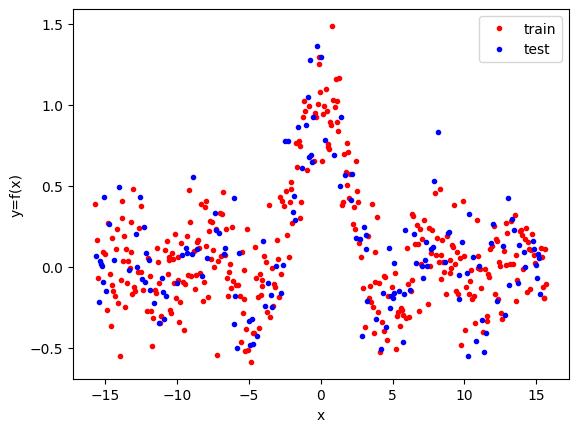

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict,ShuffleSplit

# Particionar datos
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for i, (train_i, test_i) in enumerate(rs.split(X)):
   print(i)


X_train, X_test, y_train, y_test = Xdata[train_i], Xdata[test_i], ydata[train_i], ydata[test_i]

print(X_train.shape)
print(X_test.shape)

plt.plot(X_train,y_train,'r.',label='train' )
plt.plot(X_test,y_test,'b.',label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

#**Kernels y generación de kernels**

#**Muestreo de Funciones desde Prior y Posterior en Procesos Gaussianos**

In [57]:
import matplotlib.pyplot as plt
import numpy as np


def plot_gpr_samples(gpr_model, X, x, n_samples, ax,xlabel_="x",ylabel_="y"):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    X: input samples in N x P
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """


    y_mean, y_std = gpr_model.predict(X, return_std=True) #predicted output from gpr
    y_samples = gpr_model.sample_y(X, n_samples)


    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", lw=2)
    ax.fill_between(
        x,
        y_mean - 2*y_std,
        y_mean + 2*y_std,
        alpha=0.2,
        color="black",
        label=r"$\pm$ 2 std. dev.",
    )
    ax.set_xlabel(xlabel_)
    ax.set_ylabel(ylabel_)
    #ax.set_ylim([-3, 3])

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:357: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/tmp/ipython-input-2875627464.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


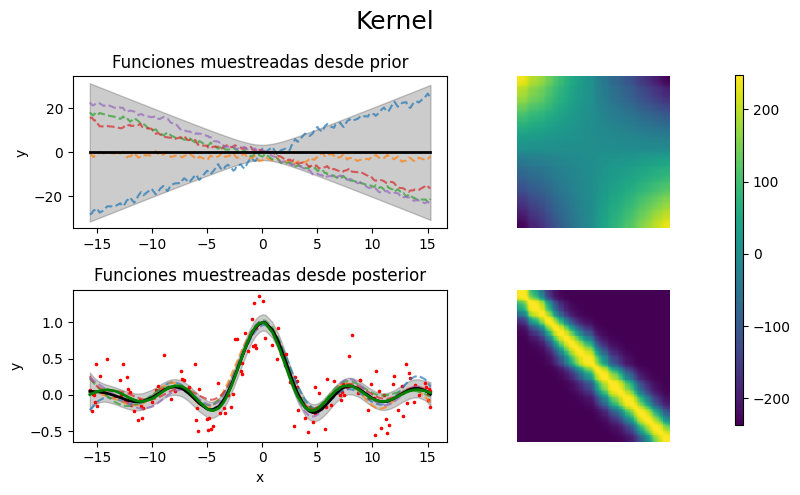

Hiperparámetro de Kernel antes de entrenar:
1**2 * RBF(length_scale=1) + 1**2 * DotProduct(sigma_0=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=1))


Hiperparámetro de Kernel después de entrenar: 
1**2 * RBF(length_scale=3.25) + 1.18e-05**2 * DotProduct(sigma_0=1e-05) + 5.05e-11**2 * ExpSineSquared(length_scale=0.0116, periodicity=9.76e+04) 
Log-likelihood: -22.203




In [58]:
# Entrenar gpr
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct,ExpSineSquared, ConstantKernel
import matplotlib


# Organizar datos para graficar
ind_ = np.argsort(X_test,axis=0).reshape(-1)

# Definir gpr
alpha = 0.1     #*1/np.var(y_train)   #1e-5

#Kernel
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds='fixed')\
         *RBF(length_scale=1,length_scale_bounds=(1e-1, 10.0))\
       + ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))\
         *DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-05, 100000.0))\
       + ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))\
         *ExpSineSquared(length_scale=1.0, periodicity=1.0,
                         length_scale_bounds=(1e-05, 100000.0),
                         periodicity_bounds=(1e-05, 100000.0))

# Crear gpr
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=0) # Crear objeto gpr

fig, axs = plt.subplots(nrows=2,  ncols=2, figsize=(8, 5))

# Plot kernel prior
K_prior = kernel(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[0,1].imshow(K_prior)
axs[0,1].axis('off')

# Plot prior
n_samples = 5
plot_gpr_samples(gpr, X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[0,0],xlabel_="")
axs[0,0].set_title("Funciones muestreadas desde prior")
#axs[0,0].set_ylim([-2,2])

# Plot posterior
gpr.fit(X_train, y_train) #entrenar GPR en train

plot_gpr_samples(gpr,  X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[1,0])
axs[1,0].scatter(X_test[ind_, 0], y_test[ind_], color="red",marker='.',s=10)
axs[1,0].plot(X_test[ind_, 0], y[test_i][ind_], color="g",lw=2) #target ytest
axs[1,0].set_title("Funciones muestreadas desde posterior")

# Plot kernel posterior después de entrenar
K_posterior = gpr.kernel_(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[1,1].imshow(K_posterior)
axs[1,1].axis('off')

cax = fig.add_axes([0.925, 0.15, 0.01, 0.7])
norm = matplotlib.colors.Normalize(vmin=min(np.append(K_prior.ravel(),K_posterior.ravel())),
                                   vmax=max(np.append(K_prior.ravel(),K_posterior.ravel())))
sm = plt.cm.ScalarMappable(cmap=None, norm=norm)
#sm.set_array([])
cbar = plt.colorbar(sm,cax=cax)


fig.suptitle("Kernel", fontsize=18)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

print(f"Hiperparámetro de Kernel antes de entrenar:\n{kernel})")
print(
    f"\n\nHiperparámetro de Kernel después de entrenar: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n\n"
)


In [59]:
# Hiperparámetros Optimizados por el GPR
np.exp(gpr.kernel_.theta)

array([3.25496707e+00, 1.38520921e-10, 1.00000000e-05, 2.54560114e-21,
       1.15517003e-02, 9.75962188e+04])

##**Para definir otros tipos de kernel ver [Gaussian Process y Kernels](https://scikit-learn.org/stable/modules/gaussian_process.html)**

#**Ejercicios**

- Pruebe otras combinaciones de kernels para entrenar el regresor.

- Estudie la influencia del hiperparámetro alpha en los resultados.




/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:357: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
/tmp/ipython-input-605831573.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


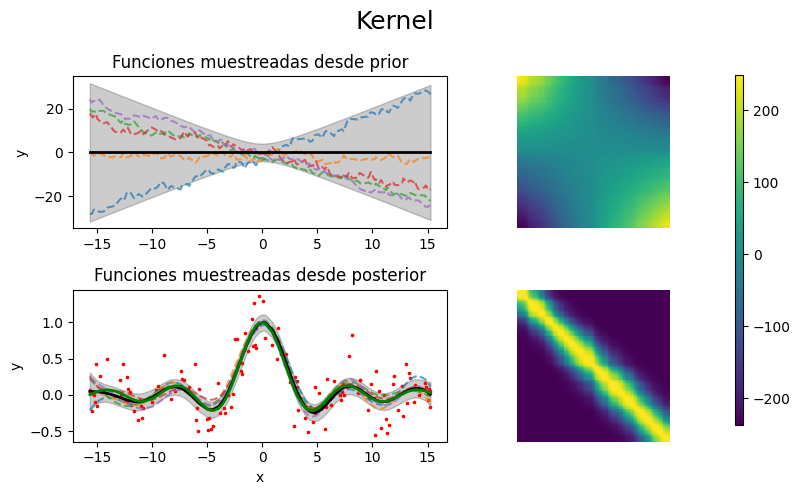

Hiperparámetro de Kernel antes de entrenar:
1**2 * RBF(length_scale=1) + 1**2 * DotProduct(sigma_0=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=1) + 1**2 * RationalQuadratic(alpha=1, length_scale=1) ** 2)


Hiperparámetro de Kernel después de entrenar: 
1**2 * RBF(length_scale=3.25) + 1.32e-05**2 * DotProduct(sigma_0=0.0039) + 2.07e-05**2 * ExpSineSquared(length_scale=3.67e+04, periodicity=45.4) + 4.09e-09**2 * RationalQuadratic(alpha=337, length_scale=6.57e+04) ** 2 
Log-likelihood: -22.203




In [60]:
# Entrenar gpr
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct,ExpSineSquared, ConstantKernel, RationalQuadratic, Exponentiation, WhiteKernel
import matplotlib


# Organizar datos para graficar
ind_ = np.argsort(X_test,axis=0).reshape(-1)

# Definir gpr
alpha = 0.1

#Kernel
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds='fixed')\
         *RBF(length_scale=1,length_scale_bounds=(1e-1, 10.0))\
       + ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))\
         *DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-05, 100000.0))\
       + ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))\
         *ExpSineSquared(length_scale=1.0, periodicity=1.0,
                         length_scale_bounds=(1e-05, 100000.0),
                         periodicity_bounds=(1e-05, 100000.0))\
       + ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))\
         *Exponentiation(RationalQuadratic(), exponent=2)

# Crear gpr
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=0) # Crear objeto gpr

fig, axs = plt.subplots(nrows=2,  ncols=2, figsize=(8, 5))

# Plot kernel prior
K_prior = kernel(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[0,1].imshow(K_prior)
axs[0,1].axis('off')

# Plot prior
n_samples = 5
plot_gpr_samples(gpr, X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[0,0],xlabel_="")
axs[0,0].set_title("Funciones muestreadas desde prior")
#axs[0,0].set_ylim([-2,2])

# Plot posterior
gpr.fit(X_train, y_train) #entrenar GPR en train

plot_gpr_samples(gpr,  X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[1,0])
axs[1,0].scatter(X_test[ind_, 0], y_test[ind_], color="red",marker='.',s=10)
axs[1,0].plot(X_test[ind_, 0], y[test_i][ind_], color="g",lw=2) #target ytest
axs[1,0].set_title("Funciones muestreadas desde posterior")

# Plot kernel posterior después de entrenar
K_posterior = gpr.kernel_(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[1,1].imshow(K_posterior)
axs[1,1].axis('off')

cax = fig.add_axes([0.925, 0.15, 0.01, 0.7])
norm = matplotlib.colors.Normalize(vmin=min(np.append(K_prior.ravel(),K_posterior.ravel())),
                                   vmax=max(np.append(K_prior.ravel(),K_posterior.ravel())))
sm = plt.cm.ScalarMappable(cmap=None, norm=norm)
#sm.set_array([])
cbar = plt.colorbar(sm,cax=cax)


fig.suptitle("Kernel", fontsize=18)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

print(f"Hiperparámetro de Kernel antes de entrenar:\n{kernel})")
print(
    f"\n\nHiperparámetro de Kernel después de entrenar: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n\n"
)

##**Impacto del Parámetro Alpha**

El parámetro alpha $\alpha$ es el parámetro de regularización rígida del regresor y se define como el inverso de la varianza permitida, matemáticamente:

$$
\alpha = \frac{1}{\sqrt{\sigma^2_\eta}}\mathbf{I}_N
$$

Así, un valor mayor para este parámetro implica una disminución en la tasa de regularización del modelo, por lo que regresor será más permisivo en la absorción de información de los datos, sin embargo, esto puede ser una causante de sobreajuste en el modelo.